# Data Collection and Cleaning

In [1]:
import pandas as pd
import numpy as np
import requests
import time
from bs4 import BeautifulSoup
import json

# Data Collection: Scraping Data

In [2]:
link = "https://data.cityofnewyork.us/api/views/kpav-sd4t/rows"
response = requests.get(link)

In [3]:
json_data = json.loads(response.text)
json_data

{'meta': {'view': {'id': 'kpav-sd4t',
   'name': 'Jobs NYC Postings',
   'assetType': 'dataset',
   'attribution': 'Department of Citywide Administrative Services (DCAS)',
   'attributionLink': 'https://cityjobs.nyc.gov/',
   'averageRating': 0,
   'category': 'City Government',
   'createdAt': 1366306816,
   'description': 'This dataset contains current job postings available on the  City of New York’s official jobs site (http://www.nyc.gov/html/careers/html/search/search.shtml).  Internal postings available to city employees and external postings available to the general public are included.',
   'displayType': 'table',
   'downloadCount': 159035,
   'hideFromCatalog': False,
   'hideFromDataJson': False,
   'locked': False,
   'newBackend': True,
   'numberOfComments': 2,
   'oid': 33229501,
   'provenance': 'official',
   'publicationAppendEnabled': True,
   'publicationDate': 1578495738,
   'publicationGroup': 804581,
   'publicationStage': 'published',
   'rowClass': '',
   'rows

In [4]:
# Although this variable name is a bit wordy, I wanted to emphasize that the data content from the json is what we want to parse and store.
# The meta data has information about the json file that is not helpful to our analysis of employment statistics
json_data_not_meta = json_data['data']

In [5]:
# create list to store all the json data

processed_data = []

# Iterate over each object in the loaded JSON data
for row in json_data_not_meta:
    # append the data from the 8th string of each list onwards
    processed_data.append(row[8:])

processed_data[1]

['639563',
 'DEPARTMENT OF CORRECTION',
 'External',
 '1',
 'Executive Assistant',
 'COMMUNITY COORDINATOR',
 'Non-Competitive-5',
 '56058',
 '00',
 'Administration & Human Resources Technology, Data & Innovation',
 'F',
 'Experienced (non-manager)',
 '59116',
 '67983',
 'Annual',
 '75-20 Astoria Blvd',
 'Information Systems-Admin',
 'The New York City Department of Correction (DOC) is an integral part of the Cityâ\x80\x99s evolving criminal justice system, participating in reform initiatives and strategies aimed to move the City towards the smallest jail system possible without compromising public safety. The DOC is solely responsible for maintaining a safe and secure environment for staff, visitors, volunteers, and people in custody inside our jails. Importantly, safe jails enable DOC to provide people in custody with the tools and opportunities they need to successfully re-enter their communities. The DOC operates facilities and court commands across the five boroughs with over 7,50

In [6]:
# create labels for columns of the dataframe
column_names = [['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date']]

# store processed data from json into data frame
ny_job_postings = pd.DataFrame(processed_data, columns = column_names)
ny_job_postings

Job ID                          Agency Posting Type # Of Positions  \
0     642115   DEPT OF DESIGN & CONSTRUCTION     Internal              5   
1     639563        DEPARTMENT OF CORRECTION     External              1   
2     554298    DEPARTMENT OF TRANSPORTATION     External              2   
3     628739   DEPT OF HEALTH/MENTAL HYGIENE     External              1   
4     622389                  LAW DEPARTMENT     External              1   
...      ...                             ...          ...            ...   
5150  545210     HRA/DEPT OF SOCIAL SERVICES     Internal              1   
5151  624243     HRA/DEPT OF SOCIAL SERVICES     Internal              1   
5152  622829   DEPT OF DESIGN & CONSTRUCTION     External              1   
5153  628376  DEPT OF ENVIRONMENT PROTECTION     Internal              1   
5154  638378   DEPT OF HEALTH/MENTAL HYGIENE     Internal              1   

                                 Business Title  \
0                               Design Engineer   
1                           Executive Assistant   
2                               Project Manager   
3                    Medicolegal Investigator I   
4                 ASSISTANT CORPORATION COUNSEL   
...                                         ...   
5150                 HEADCOUNT & BUDGET ANALYST   
5151                    FRONT DOOR RECEPTIONIST   
5152                 Inter - Agency Coordinator   
5153                  ASSISTANT PROJECT MANAGER   
5154  Assistant General Counsel - Legal Affairs   

                 Civil Service Title Title Classification Title Code No Level  \
0           ASSISTANT CIVIL ENGINEER        Competitive-1         20210    00   
1              COMMUNITY COORDINATOR    Non-Competitive-5         56058    00   
2           CIVIL ENGINEERING INTERN        Competitive-1         20202    00   
3     MEDICOLEGAL INVESTIGATOR (OCME    Non-Competitive-5         53299    01   
4      ASSISTANT CORPORATION COUNSEL             Exempt-4         30112    00   
...                              ...                  ...           ...   ...   
5150         ASSOCIATE STAFF ANALYST        Competitive-1         12627    00   
5151              CLERICAL ASSOCIATE        Competitive-1         10251    03   
5152       ASSOCIATE PROJECT MANAGER        Competitive-1         22427    02   
5153  ASSISTANT ENVIRONMENTAL ENGINE        Competitive-1         20617    00   
5154                 AGENCY ATTORNEY    Non-Competitive-5         30087    02   

                                           Job Category  ...  \
0                 Engineering, Architecture, & Planning  ...   
1     Administration & Human Resources Technology, D...  ...   
2                 Engineering, Architecture, & Planning  ...   
3                                                Health  ...   
4                                         Legal Affairs  ...   
...                                                 ...  ...   
5150  Administration & Human Resources Finance, Acco...  ...   
5151                                    Social Services  ...   
5152              Engineering, Architecture, & Planning  ...   
5153  Engineering, Architecture, & Planning Public S...  ...   
5154                               Health Legal Affairs  ...   

                                 Additional Information  \
0                                                  None   
1     The City of New York offers a comprehensive be...   
2                                                  None   
3     SPECIAL NOTE  1.\tSelected Candidates will be ...   
4                                                  None   
...                                                 ...   
5150  **LOAN FORGIVENESS  The federal government pro...   
5151  In addition, the Human Resources Administratio...   
5152                                               None   
5153                                               None   
5154                                               None   

                             

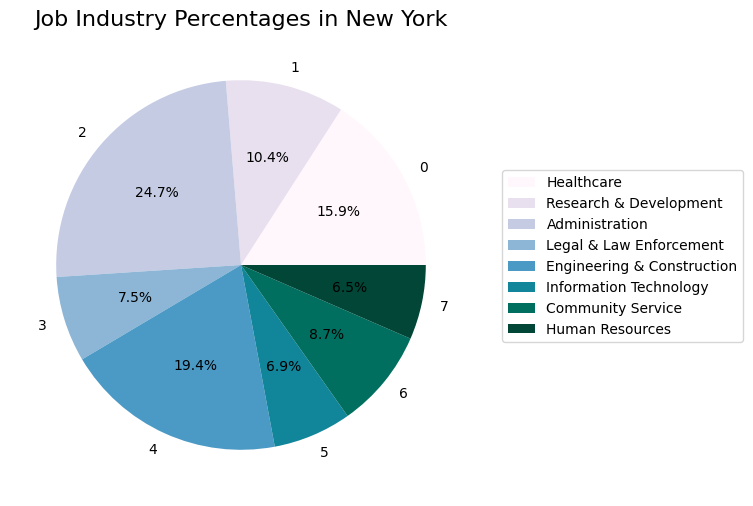

In [19]:
# SOLMIH PIE CHART
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Category': ['Healthcare', 'Research & Development', 'Administration',
                 'Legal & Law Enforcement', 'Engineering & Construction',
                 'Information Technology', 'Community Service',
                 'Human Resources'],
    '': [15.89, 10.41, 24.71, 7.49, 19.39, 6.85, 8.69, 6.52]
}
df = pd.DataFrame(data)

cmap = plt.get_cmap("PuBuGn")

colors = cmap(np.linspace(0, 1, len(data['Category'])))



df.plot.pie(y='', autopct='%1.1f%%', colors=colors, figsize=(6, 6))
plt.title("Job Industry Percentages in New York", fontsize=16)  # Set fontsize to 16
plt.legend(df['Category'], loc='upper left', bbox_to_anchor=(1.05, 0.72))
plt.show()

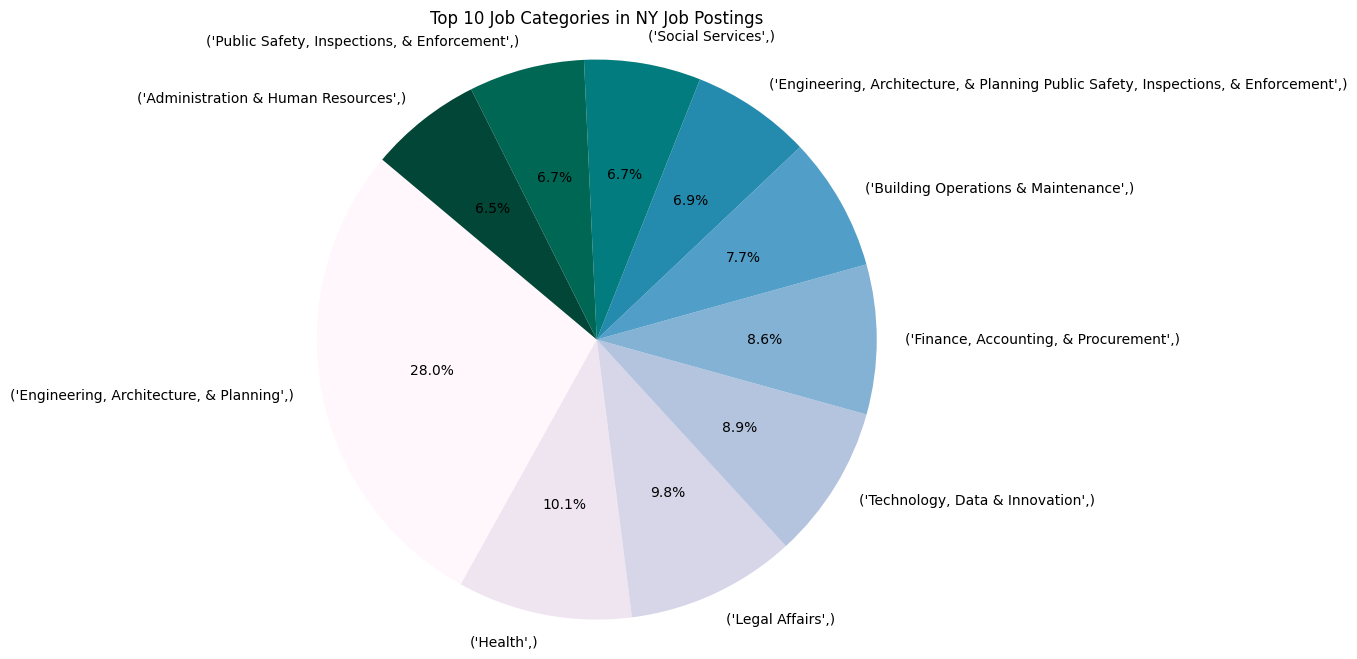

In [8]:
# MY PIE CHART

import matplotlib.pyplot as plt
import numpy as np

top_categories = ny_job_postings["Job Category"].value_counts().head(10)
cmap = plt.get_cmap("PuBuGn")
colors = cmap(np.linspace(0, 1, len(top_categories)))
plt.figure(figsize=(10, 8))  # Set the figure size
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 10 Job Categories in NY Job Postings')
plt.axis('equal')

plt.show()


# Data Cleaning

In [10]:
ny_job_postings["Agency"]

Agency
0      DEPT OF DESIGN & CONSTRUCTION
1           DEPARTMENT OF CORRECTION
2       DEPARTMENT OF TRANSPORTATION
3      DEPT OF HEALTH/MENTAL HYGIENE
4                     LAW DEPARTMENT
...                              ...
5150     HRA/DEPT OF SOCIAL SERVICES
5151     HRA/DEPT OF SOCIAL SERVICES
5152   DEPT OF DESIGN & CONSTRUCTION
5153  DEPT OF ENVIRONMENT PROTECTION
5154   DEPT OF HEALTH/MENTAL HYGIENE

[5155 rows x 1 columns]

In [11]:
# NaN values in Work Location, let's use classification to predict some of the locations
# maybe use an API
ny_job_postings["Work Location"]

Work Location
0     30-30 Thomson Ave L I City Qns
1                 75-20 Astoria Blvd
2                  55 Water St Ny Ny
3         421 East 26th Street NY NY
4               100 Church St., N.Y.
...                              ...
5150            4 World Trade Center
5151        88-11 165 Street Jamaica
5152  30-30 Thomson Ave L I City Qns
5153  465 Columbus Ave. Valhalla, Ny
5154               42-09 28th Street

[5155 rows x 1 columns]

In [12]:
ny_job_postings["Salary Range To"]

Salary Range To
0              71726
1              67983
2              62260
3              93825
4              85.25
...              ...
5150           81203
5151           45728
5152           93807
5153           93587
5154           90000

[5155 rows x 1 columns]

In [16]:
ny_job_postings["Salary Range To"].fillna(0, inplace=True)
ny_job_postings["Salary Range From"].fillna(0, inplace=True)

salary_avg = (ny_job_postings["Salary Range To"] + ny_job_postings["Salary Range From"]) / 2
salary_avg

<ipython-input-16-179c0ad27ac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_job_postings["Salary Range To"].fillna(0, inplace=True)
<ipython-input-16-179c0ad27ac4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_job_postings["Salary Range From"].fillna(0, inplace=True)


Salary Range From Salary Range To
0                  NaN             NaN
1                  NaN             NaN
2                  NaN             NaN
3                  NaN             NaN
4                  NaN             NaN
...                ...             ...
5150               NaN             NaN
5151               NaN             NaN
5152               NaN             NaN
5153               NaN             NaN
5154               NaN             NaN

[5155 rows x 2 columns]

In [ ]:
ny_job_postings["Hours/Shift"].value_counts()

# Preparing Data for Machine Learning

# Additional Web Scraping

In [20]:
# read in the HTML file
url = "https://data.ny.gov/api/views/gkgz-nw24/rows"
response = requests.get(url)

In [21]:
json_data = json.loads(response.text)
#json_data

In [22]:
# Although this variable name is a bit wordy, I wanted to emphasize that the data content from the json is what we want to parse and store.
# The meta data has information about the json file that is not helpful to our analysis of employment statistics
json_data_not_meta = json_data['data']

In [23]:
# create list to store all the json data

processed_data = []

# Iterate over each object in the loaded JSON data
for row in json_data_not_meta:
    # append the data from the 8th string of each list onwards
    processed_data.append(row[8:])

#processed_data

In [24]:
# create labels for columns of the dataframe
column_names = ["Area Type", "Area", "Area Name", "Standard Occupational Code", "Occupational Title", "Employment", "Mean Wage", "Median Wage", "Entry Wage", "Experienced Wage"]

# store processed data from json into data frame
ny_jobs = pd.DataFrame(processed_data, columns = column_names)
ny_jobs

Area Type Area         Area Name Standard Occupational Code  \
0            1   36    New York State                    00-0000   
1            1   36    New York State                    11-0000   
2            1   36    New York State                    11-1011   
3            1   36    New York State                    11-1021   
4            1   36    New York State                    11-1031   
...        ...  ...               ...                        ...   
7064        10   10  Western New York                    53-7064   
7065        10   10  Western New York                    53-7065   
7066        10   10  Western New York                    53-7073   
7067        10   10  Western New York                    53-7081   
7068        10   10  Western New York                    53-7121   

                             Occupational Title Employment Mean Wage  \
0                        Total, All Occupations    9392830     81061   
1                        Management Occupations     611690    183387   
2                              Chief Executives       7630    332030   
3               General and Operations Managers     212770    169014   
4                                   Legislators       None    107926   
...                                         ...        ...       ...   
7064                Packers and Packagers, Hand       1580     37249   
7065                 Stockers and Order Fillers      10410     40445   
7066                           Wellhead Pumpers       None     39005   
7067  Refuse and Recyclable Material Collectors        340     44781   
7068          Tank Car, Truck, and Ship Loaders       None     55916   

     Median Wage Entry Wage Experienced Wage  
0          58603      36871           103157  
1         156228      82695           233733  
2         218134     128735           433677  
3         129400      68869           219086  
4         100930      43497           140140  
...          ...        ...              ...  
7064       35529      31925            39911  
7065       38911      32896            44219  
7066       39171      31911            42553  
7067       37464      32400            50972  
7068       59120      42534            62606  

[7069 rows x 10 columns]

In [25]:
ny_jobs["Area Name"].value_counts()

Area Name
New York State      791
New York City       705
Long Island         679
Western New York    673
Hudson Valley       666
Capital Region      661
Finger Lakes        653
Central New York    613
Southern Tier       607
Mohawk Valley       544
North Country       477
Name: count, dtype: int64

In [26]:
# CALCULATE MEDIAN SALARY FOR EACH REGION
NY_State_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "New York State"]["Median Wage"].sort_values(ascending=True).median()
NY_City_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "New York City"]["Median Wage"].sort_values(ascending=True).median()
Western_NY_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "Western New York"]["Median Wage"].sort_values(ascending=True).median()
Long_Island_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "Long Island"]["Median Wage"].sort_values(ascending=True).median()
Capital_Region_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "Capital Region"]["Median Wage"].sort_values(ascending=True).median()
Finger_Lakes_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "Finger Lakes"]["Median Wage"].sort_values(ascending=True).median()
Hudson_Valley_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "Hudson Valley"]["Median Wage"].sort_values(ascending=True).median()
Central_NY_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "Central New York"]["Median Wage"].sort_values(ascending=True).median()
Southern_Teir_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "Southern Tier"]["Median Wage"].sort_values(ascending=True).median()
Mohawk_Valley_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "Mohawk Valley"]["Median Wage"].sort_values(ascending=True).median()
North_Country_Median_Salary = ny_jobs[ny_jobs["Area Name"] == "North Country"]["Median Wage"].sort_values(ascending=True).median()

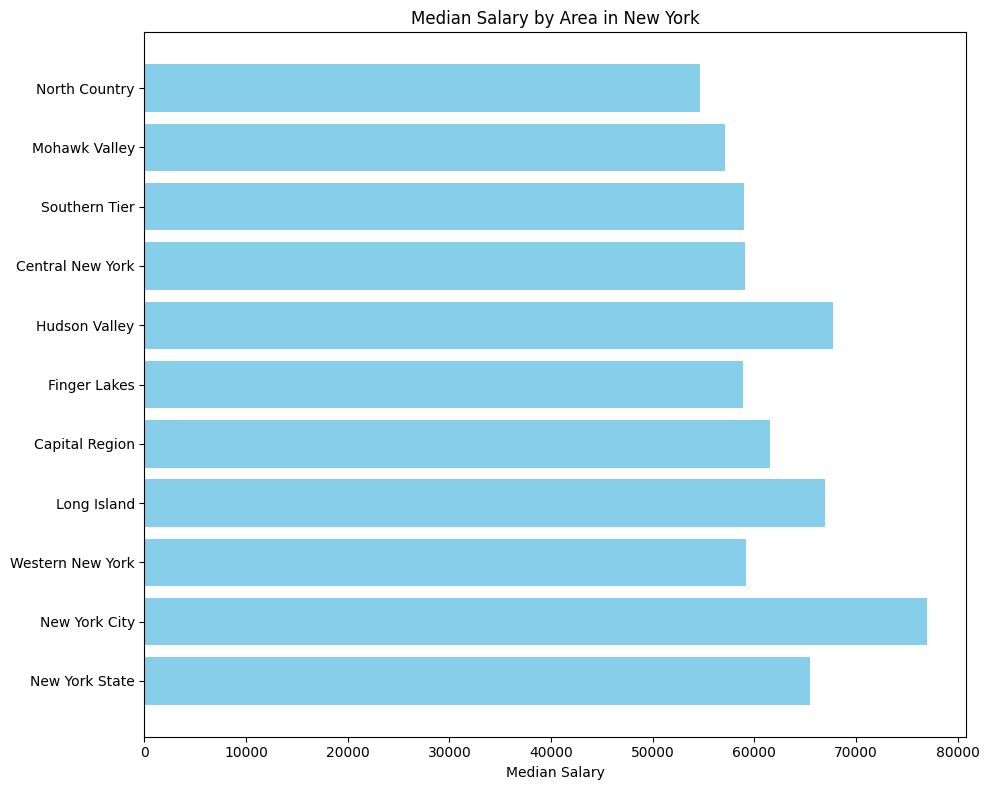

In [27]:
import matplotlib.pyplot as plt

area_names = [
    "New York State",
    "New York City",
    "Western New York",
    "Long Island",
    "Capital Region",
    "Finger Lakes",
    "Hudson Valley",
    "Central New York",
    "Southern Tier",
    "Mohawk Valley",
    "North Country"
]

median_salaries = [
    NY_State_Median_Salary,
    NY_City_Median_Salary,
    Western_NY_Median_Salary,
    Long_Island_Median_Salary,
    Capital_Region_Median_Salary,
    Finger_Lakes_Median_Salary,
    Hudson_Valley_Median_Salary,
    Central_NY_Median_Salary,
    Southern_Teir_Median_Salary,
    Mohawk_Valley_Median_Salary,
    North_Country_Median_Salary
]

plt.figure(figsize=(10, 8))
plt.barh(area_names, median_salaries, color='skyblue')
plt.xlabel('Median Salary')
plt.title('Median Salary by Area in New York')  # Title of the graph
plt.tight_layout()
plt.show()


North Country median home price: 20,400

Mohawk New York: 13,332

Southern Tier: 12144

Central NY: $16464

Hudson Valley: 26580

Finger Lakes: 21720

Capital Region: 19380

Long Island: 47784

Western NY: 15252

NYC: 45408

NY State: 79704

<Figure size 1800x2000 with 0 Axes>

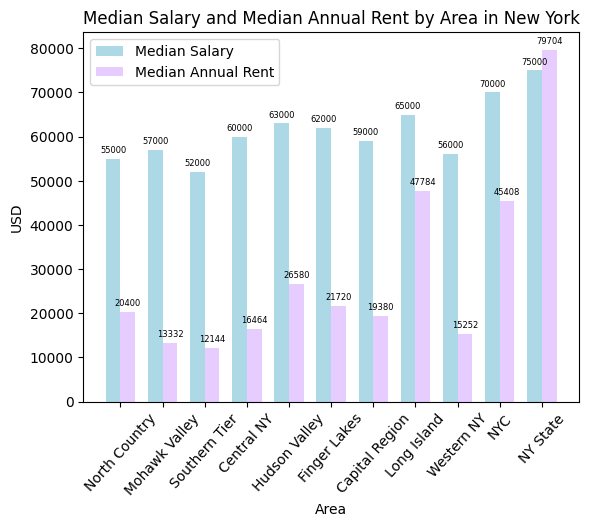

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

median_home_prices = [
    20400,  # North Country
    13332,  # Mohawk Valley
    12144,  # Southern Tier
    16464,  # Central NY
    26580,  # Hudson Valley
    21720,  # Finger Lakes
    19380,  # Capital Region
    47784,  # Long Island
    15252,  # Western NY
    45408,  # NYC
    79704   # NY State
]

plt.figure(figsize=(18, 20))

ind = np.arange(len(area_names))  # the x locations for the groups
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
salary_bars = ax.bar(ind - width/2, median_salaries, width, label='Median Salary', color='lightblue')
price_bars = ax.bar(ind + width/2, median_home_prices, width, label='Median Annual Rent', color='#e6ccff')

ax.set_xlabel('Area')
ax.set_ylabel('USD')
ax.set_title('Median Salary and Median Annual Rent by Area in New York')
ax.set_xticks(ind)
ax.set_xticklabels(area_names, rotation=48, ha='center')
ax.legend()

def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=6)

autolabel(salary_bars)
autolabel(price_bars)



plt.show()


<Figure size 2000x2600 with 0 Axes>

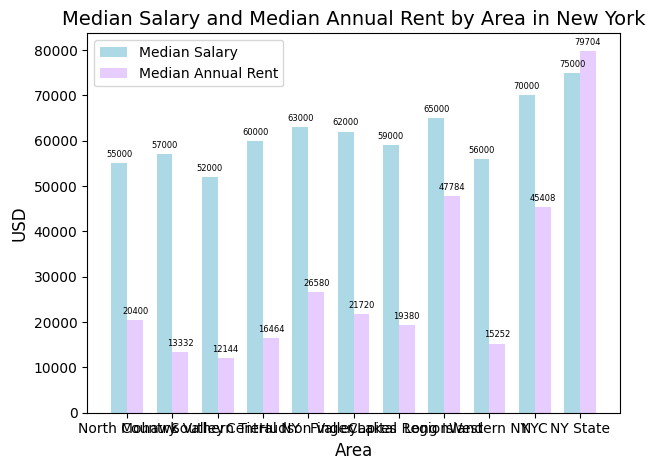

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Median salaries and median home prices data
median_salaries = [55000, 57000, 52000, 60000, 63000, 62000, 59000, 65000, 56000, 70000, 75000]  # Example data
area_names = ['North Country', 'Mohawk Valley', 'Southern Tier', 'Central NY', 'Hudson Valley',
              'Finger Lakes', 'Capital Region', 'Long Island', 'Western NY', 'NYC', 'NY State']  # Example labels

plt.figure(figsize=(20, 26))  # Adjust the figure size to accommodate the labels

ind = np.arange(len(area_names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
salary_bars = ax.bar(ind - width/2, median_salaries, width, label='Median Salary', color='lightblue')
price_bars = ax.bar(ind + width/2, median_home_prices, width, label='Median Annual Rent', color='#e6ccff')

ax.set_xlabel('Area', fontsize=12)  # Set x-label font size
ax.set_ylabel('USD', fontsize=12)  # Set y-label font size
ax.set_title('Median Salary and Median Annual Rent by Area in New York', fontsize=14)  # Set title font size
ax.set_xticks(ind)
ax.set_xticklabels(area_names, fontsize=10, ha='center')  # Set x-label font size and alignment
ax.legend()

def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Adjust the y offset for better clarity
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=6)  # Adjust the fontsize for better clarity

autolabel(salary_bars)
autolabel(price_bars)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
# CLUSTER THE JOBS ABOVE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(ny_jobs['Occupational Title'])

true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

ny_jobs['Cluster'] = model.labels_

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}:")
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(', '.join(top_ten_words))

In [28]:
# CLUSTER THE JOBS ABOVE INTO CATEGORIES BASED ON THE TOP 10 JOB POSTINGS DATAFRAME
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

job_titles = ny_jobs['Occupational Title']
categories = [
    "Health",
    "Public Safety, Inspections, & Enforcement",
    "Legal Affairs",
    "Constituent Services & Community Programs",
    "Health Policy, Research & Analysis",
    "Building Operations & Maintenance",
    "Finance, Accounting & Procurement",
    "Technology, Data & Innovation",
    "Social Services",
    "Engineering, Architecture & Planning",
    "Administration & Human Resources"
]

vectorizer = TfidfVectorizer(stop_words='english')

vectorizer.fit(categories)

job_titles_vec = vectorizer.transform(job_titles)
categories_vec = vectorizer.transform(categories)

similarity = cosine_similarity(job_titles_vec, categories_vec)

assigned_categories_indices = np.argmax(similarity, axis=1)
assigned_categories = [categories[index] for index in assigned_categories_indices]

ny_jobs['Assigned Category'] = assigned_categories

In [29]:
import pandas as pd


for index, row in ny_job_postings.iterrows():
    job_category = row["Job Category"]
    matching_row = ny_jobs[ny_jobs["Assigned Category"] == job_category]

    if not matching_row.empty:
        median_salary = matching_row["Median Wage"].iloc[0]

        ny_job_postings.at[index, "Median Salary"] = median_salary

print(ny_job_postings)


      Job ID                          Agency Posting Type # Of Positions  \
0     642115   DEPT OF DESIGN & CONSTRUCTION     Internal              5   
1     639563        DEPARTMENT OF CORRECTION     External              1   
2     554298    DEPARTMENT OF TRANSPORTATION     External              2   
3     628739   DEPT OF HEALTH/MENTAL HYGIENE     External              1   
4     622389                  LAW DEPARTMENT     External              1   
...      ...                             ...          ...            ...   
5150  545210     HRA/DEPT OF SOCIAL SERVICES     Internal              1   
5151  624243     HRA/DEPT OF SOCIAL SERVICES     Internal              1   
5152  622829   DEPT OF DESIGN & CONSTRUCTION     External              1   
5153  628376  DEPT OF ENVIRONMENT PROTECTION     Internal              1   
5154  638378   DEPT OF HEALTH/MENTAL HYGIENE     Internal              1   

                                 Business Title  \
0                               Desi

In [ ]:

print("Unique values in 'Job Category' column:", ny_job_postings_reset["Job Category"].values)


In [ ]:
ny_job_postings['Job Category'] = ny_job_postings['Job Category'].astype(str)

ny_job_postings['Job Category'] = ny_job_postings['Job Category'].apply(lambda x: x.split(','))

ny_job_postings_exploded = ny_job_postings.explode('Job Category')

median_salaries = ny_job_postings_exploded.groupby("Job Category")["Median Salary"].median()

top_categories = median_salaries.sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 6))

plt.barh(np.arange(len(top_categories)), median_salaries[top_categories], color=plt.cm.viridis(np.linspace(0, 1, len(top_categories))))
plt.xlabel('Median Salary')
plt.ylabel('Job Category')
plt.title('Median Salary by Job Category')

for index, value in enumerate(median_salaries[top_categories]):
    plt.text(value, index, str(int(value)), ha='left')

color_bar = plt.cm.ScalarMappable(cmap='viridis')
color_bar.set_array(median_salaries[top_categories])
cbar = plt.colorbar(color_bar)
cbar.set_label('Median Salary')
plt.yticks(np.arange(len(top_categories)), top_categories)

plt.tight_layout()
plt.show()




White-collar workers make up 83.27% of the working population in New York, while blue-collar employees account for 16.73%. There are also 934,026 entrepreneurs in New York (9.67% of the workforce); 6,113,846 workers employed in private companies (63.27%); and 1,544,005 people working in governmental institutions (15.98%).


The average family in New York has 2.42 members. New York is home to over 4 million children, with 32% of them in single-family households. The Median Household Income is $81,386, 69% of the state population are renters. On face value, the statistics don't seem out of the ordinary; in fact, one may even claim New York promotes great prospects of being financially well off, as its median household income is 10% higher than the national average even though the household size is smaller. But is that truly the case--namely, is income evenly distributed across various regions in New York and do all children experience similar prospects of a bright and financially-stable future?


- if the average family size + household moved to each of the following regions, how would their prospects of leaving the poverty line change?


EDITED:

Among the bustling metropolis that form the state of New York, 83.27% of its workforce dons the white-collar, navigating the intricate labyrinths of office buildings that scrape the sky. In contrast, 16.73% wear the blue-collar, embodying the spirit of physical labor that keeps the city’s heart beating.

The narrative our research delves into analyzes the families of New York, where the average household comprises 2.42 members; over 4 million children fill homes and apartments, and 32% of them grow up in single-parent households.

With a median household income of $81,386, 10% above the national average, New York presents itself as a land of opportunity. Yet, beneath the shimmering surface, the question presents itself: is income evenly distributed across various regions in New York and do all children experience similar prospects of a bright and financially-stable future?

Beyond the data metrics and census statistics, we seek to understand the dreams, struggles, and pursuit of happiness in the concrete jungle of New York. Our research strives to look beyond the facade of medians in order to uncover the real stories of those who call this city home.

HOW MUCH MORE LIKELY ARE CHILDREN OF THE TYPICAL NY FAMILY TO ENTER THE POVERTY LINE IF THEY LIVED IN THE FOLLOWING REGIONS?

NYC: 18%
Western NY: 7.9%
Long Island: 5.9%
Capital Region: 10.4%
Finger Lakes: 13.27%
Hudson Valley: 36%
Central NY: 46.9%
Southern Tier: 24.9%
Mohawk Valley: 33%
North Country: 13.7%

This is given the average number of job opportunity increases:
NYC: 24500
Western NY: 8500
Long Island: 19500
Capital Region: 7100
Finger Lakes: 6500
Hudson Valley: 10400
Central NY: 5100
Southern Tier: 7500
Mohawk Valley: 100
North Country: 2400

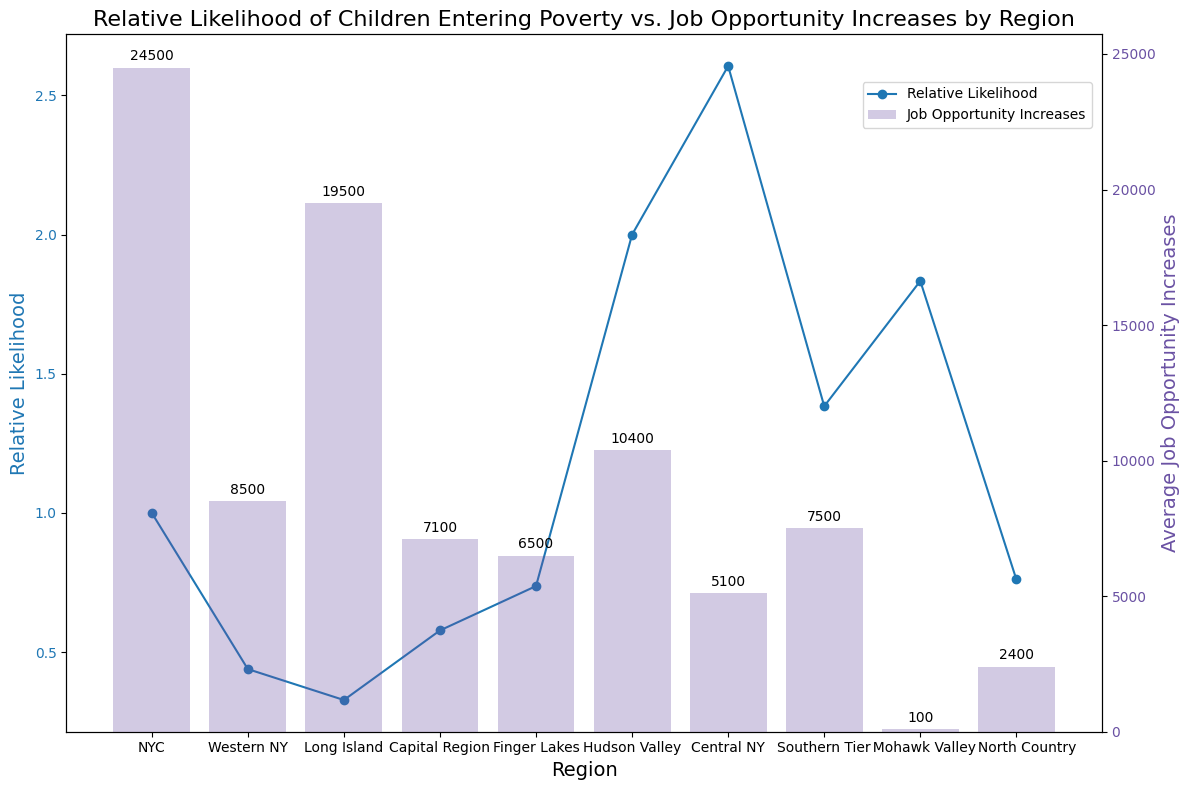

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

regions = ['NYC', 'Western NY', 'Long Island', 'Capital Region', 'Finger Lakes',
           'Hudson Valley', 'Central NY', 'Southern Tier', '  Mohawk Valley', '     North Country']
poverty_rates = [18, 7.9, 5.9, 10.4, 13.27, 36, 46.9, 24.9, 33, 13.7]
job_op_increases = [24500, 8500, 19500, 7100, 6500, 10400, 5100, 7500, 100, 2400]

typical_poverty_rate = poverty_rates[0]
relative_likelihood = [(rate / typical_poverty_rate) for rate in poverty_rates]

data = {'Region': regions,
        'Relative Likelihood': relative_likelihood,
        'Job Opportunity Increases': job_op_increases}
df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df['Region'], df['Relative Likelihood'], marker='o', color='tab:blue', label='Relative Likelihood')
ax1.set_xlabel('Region', fontsize=14)
ax1.set_ylabel('Relative Likelihood', color='tab:blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
bars = ax2.bar(df['Region'], df['Job Opportunity Increases'], alpha=0.3, color='#6a51a3', label='Job Opportunity Increases')
ax2.set_ylabel('Average Job Opportunity Increases', color='#6a51a3', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#6a51a3')

for bar in bars:
    height = bar.get_height()
    ax2.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Relative Likelihood of Children Entering Poverty vs. Job Opportunity Increases by Region', fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.9))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


PREDICTED POVERTY LEVELS 5-10 years from now

In [ ]:
poverty_data = pd.read_csv("NY_Poverty.csv")
poverty_data.head()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
years = poverty_data.columns[1:].astype(int).values.reshape(-1, 1)
US_poverty = poverty_data.iloc[0, 1:].values.reshape(-1, 1)
NY_State_poverty = poverty_data.iloc[1, 1:].values.reshape(-1, 1)
NYC_poverty = poverty_data.iloc[32, 1:].values.reshape(-1, 1)

US_model = LinearRegression()
US_model.fit(years, US_poverty)

NY_State_model = LinearRegression()
NY_State_model.fit(years, NY_State_poverty)

NYC_model = LinearRegression()
NYC_model.fit(years, NYC_poverty)

future_years = np.arange(2025, 2031).reshape(-1, 1)
US_predictions = US_model.predict(future_years)
NY_State_predictions = NY_State_model.predict(future_years)
NYC_predictions = NYC_model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.plot(future_years, US_predictions, label='US', linestyle='--')
plt.plot(future_years, NY_State_predictions, label='NY State', linestyle='--')
plt.plot(future_years, NYC_predictions, label='NYC', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.title('Predicted Poverty Levels (2025-2030)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

years = poverty_data.columns[1:].astype(int).values.reshape(-1, 1)
US_poverty = poverty_data.iloc[0, 1:].values.reshape(-1, 1)
NY_State_poverty = poverty_data.iloc[1, 1:].values.reshape(-1, 1)
NYC_poverty = poverty_data.iloc[32, 1:].values.reshape(-1, 1)

US_model = LinearRegression()
US_model.fit(years, US_poverty)

NY_State_model = LinearRegression()
NY_State_model.fit(years, NY_State_poverty)

NYC_model = LinearRegression()
NYC_model.fit(years, NYC_poverty)

# Additional counties to predict
counties_to_predict = ['Albany', 'Bronx', 'Queens']
county_predictions = {}

for county in counties_to_predict:
    county_data = poverty_data[poverty_data['County'] == county].iloc[:, 1:].values.reshape(-1, 1)
    county_model = LinearRegression()
    county_model.fit(years, county_data)
    county_predictions[county] = county_model.predict(np.arange(2025, 2031).reshape(-1, 1))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(2025, 2031), US_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='US', linestyle='--')
plt.plot(np.arange(2025, 2031), NY_State_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='NY State', linestyle='--')
plt.plot(np.arange(2025, 2031), NYC_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='NYC', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.title('Predicted Poverty Levels (2025-2030)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
bar_width = 0.2
for i, county in enumerate(counties_to_predict):
    plt.bar(np.arange(2025, 2031) + (i - 1) * bar_width, county_predictions[county].flatten(), width=bar_width, label=county)
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.title('Predicted Poverty Levels for Selected Counties (2025-2030)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


years = poverty_data.columns[1:].astype(int).values.reshape(-1, 1)
US_poverty = poverty_data.iloc[0, 1:].values.reshape(-1, 1)
NY_State_poverty = poverty_data.iloc[1, 1:].values.reshape(-1, 1)
NYC_poverty = poverty_data.iloc[32, 1:].values.reshape(-1, 1)

# Train a linear regression model for each location
US_model = LinearRegression()
US_model.fit(years, US_poverty)

NY_State_model = LinearRegression()
NY_State_model.fit(years, NY_State_poverty)

NYC_model = LinearRegression()
NYC_model.fit(years, NYC_poverty)

counties_to_predict = ['Albany', 'Bronx', 'Queens']
county_predictions = {}

for county in counties_to_predict:
    county_data = poverty_data[poverty_data['County'] == county].iloc[:, 1:].values.reshape(-1, 1)
    county_model = LinearRegression()
    county_model.fit(years, county_data)
    county_predictions[county] = county_model.predict(np.arange(2025, 2031).reshape(-1, 1))

plt.figure(figsize=(12, 6))

plt.plot(np.arange(2025, 2031), US_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='US', linestyle='--', color='#ffb3b3', linewidth=3)
plt.plot(np.arange(2025, 2031), NY_State_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='NY State', linestyle='--', color='#7c9161', linewidth=3)
plt.plot(np.arange(2025, 2031), NYC_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='NYC', linestyle='--', color='#d9b3ff', linewidth=3)

bar_width = 0.2
for i, county in enumerate(counties_to_predict):
    plt.bar(np.arange(2025, 2031) + (i - 1) * bar_width, county_predictions[county].flatten(), width=bar_width, label=county, color=plt.cm.tab20c(i))

plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.title('Predicted Poverty Levels (2025-2030)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

years = poverty_data.columns[1:].astype(int).values.reshape(-1, 1)
US_poverty = poverty_data.iloc[0, 1:].values.reshape(-1, 1)
NY_State_poverty = poverty_data.iloc[1, 1:].values.reshape(-1, 1)
NYC_poverty = poverty_data.iloc[32, 1:].values.reshape(-1, 1)

US_model = LinearRegression()
US_model.fit(years, US_poverty)

NY_State_model = LinearRegression()
NY_State_model.fit(years, NY_State_poverty)

NYC_model = LinearRegression()
NYC_model.fit(years, NYC_poverty)

counties_to_predict = ['Albany', 'Bronx', 'Queens']
county_predictions = {}

for county in counties_to_predict:
    county_data = poverty_data[poverty_data['County'] == county].iloc[:, 1:].values.reshape(-1, 1)
    county_model = LinearRegression()
    county_model.fit(years, county_data)
    county_predictions[county] = county_model.predict(np.arange(2025, 2031).reshape(-1, 1))

plt.figure(figsize=(12, 6))

plt.plot(np.arange(2025, 2031), US_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='US', linestyle='--', color='#ffb3b3', linewidth=3)
plt.plot(np.arange(2025, 2031), NY_State_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='NY State', linestyle='--', color='#7c9161', linewidth=3)
plt.plot(np.arange(2025, 2031), NYC_model.predict(np.arange(2025, 2031).reshape(-1, 1)), label='NYC', linestyle='--', color='#d9b3ff', linewidth=3)

cmap = get_cmap('GnBu')

bar_width = 0.2
for i, county in enumerate(counties_to_predict):
    plt.bar(np.arange(2025, 2031) + (i - 1) * bar_width, county_predictions[county].flatten(), width=bar_width, label=county, color=cmap(0.3 + 0.2 * i))

plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.title('Predicted Poverty Levels (2025-2030)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
private_school = pd.read_csv("Private School.csv")
private_school

Type of School  Total Enrollment  \
0  Public District School: Outside NYC           1558235   
1  Public Charter School: Outside NYC             185916   
2          Private School: Outsde NYC              28460   
3          Public District School: NYC            948047   
4          Public Charter School: NYC             256678   
5                 Private School: NYC             118997   

  Percentage of Low-Income  
0                      60%  
1                      17%  
2                       3%  
3                      66%  
4                      33%  
5                       5%

<ipython-input-6-a59e16c807f5>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-6-a59e16c807f5>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(private_school['Type of School'], rotation=45, ha="right")


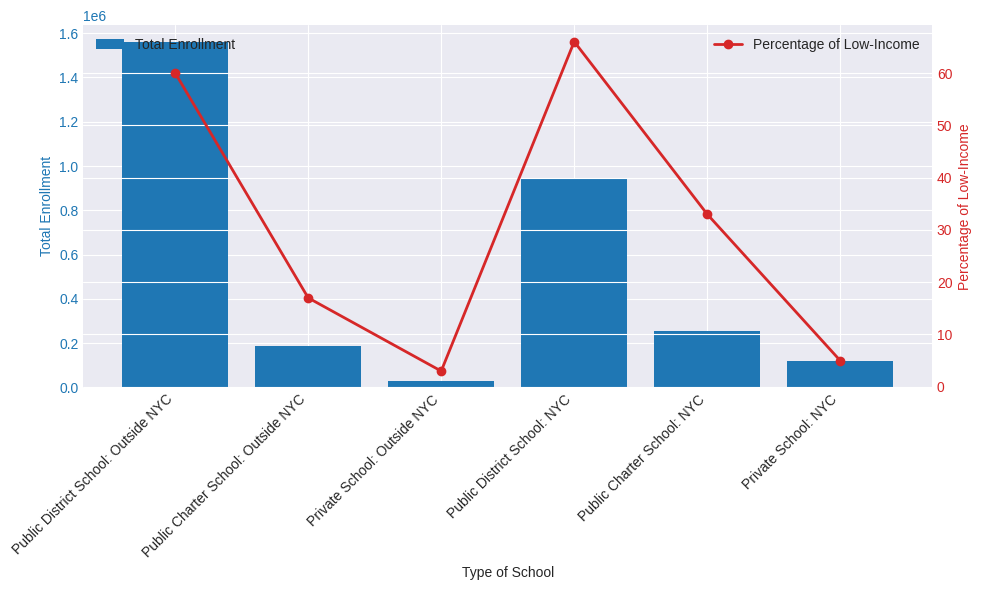

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Type of School': ['Public District School: Outside NYC', 'Public Charter School: Outside NYC', 'Private School: Outside NYC',
                       'Public District School: NYC', 'Public Charter School: NYC', 'Private School: NYC'],
    'Total Enrollment': [1558235, 185916, 28460, 948047, 256678, 118997],
    'Percentage of Low-Income': [60, 17, 3, 66, 33, 5]
}

private_school = pd.DataFrame(data)

plt.style.use('seaborn-darkgrid')
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Total Enrollment
color = 'tab:blue'
ax1.set_xlabel('Type of School')
ax1.set_ylabel('Total Enrollment', color=color)
bars = ax1.bar(private_school['Type of School'], private_school['Total Enrollment'], color=color, label='Total Enrollment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(private_school['Type of School'], rotation=45, ha="right")

# Adding legend for Total Enrollment
ax1.legend(loc='upper left')

# Line plot for Percentage of Low-Income on the second y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage of Low-Income', color=color)
line = ax2.plot(private_school['Type of School'], private_school['Percentage of Low-Income'], color=color, marker='o', linewidth=2, linestyle='-', label='Percentage of Low-Income')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legend for Percentage of Low-Income
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


<ipython-input-12-aec83f83d1f0>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-12-aec83f83d1f0>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(private_school['Type of School'], rotation=45, ha="right")


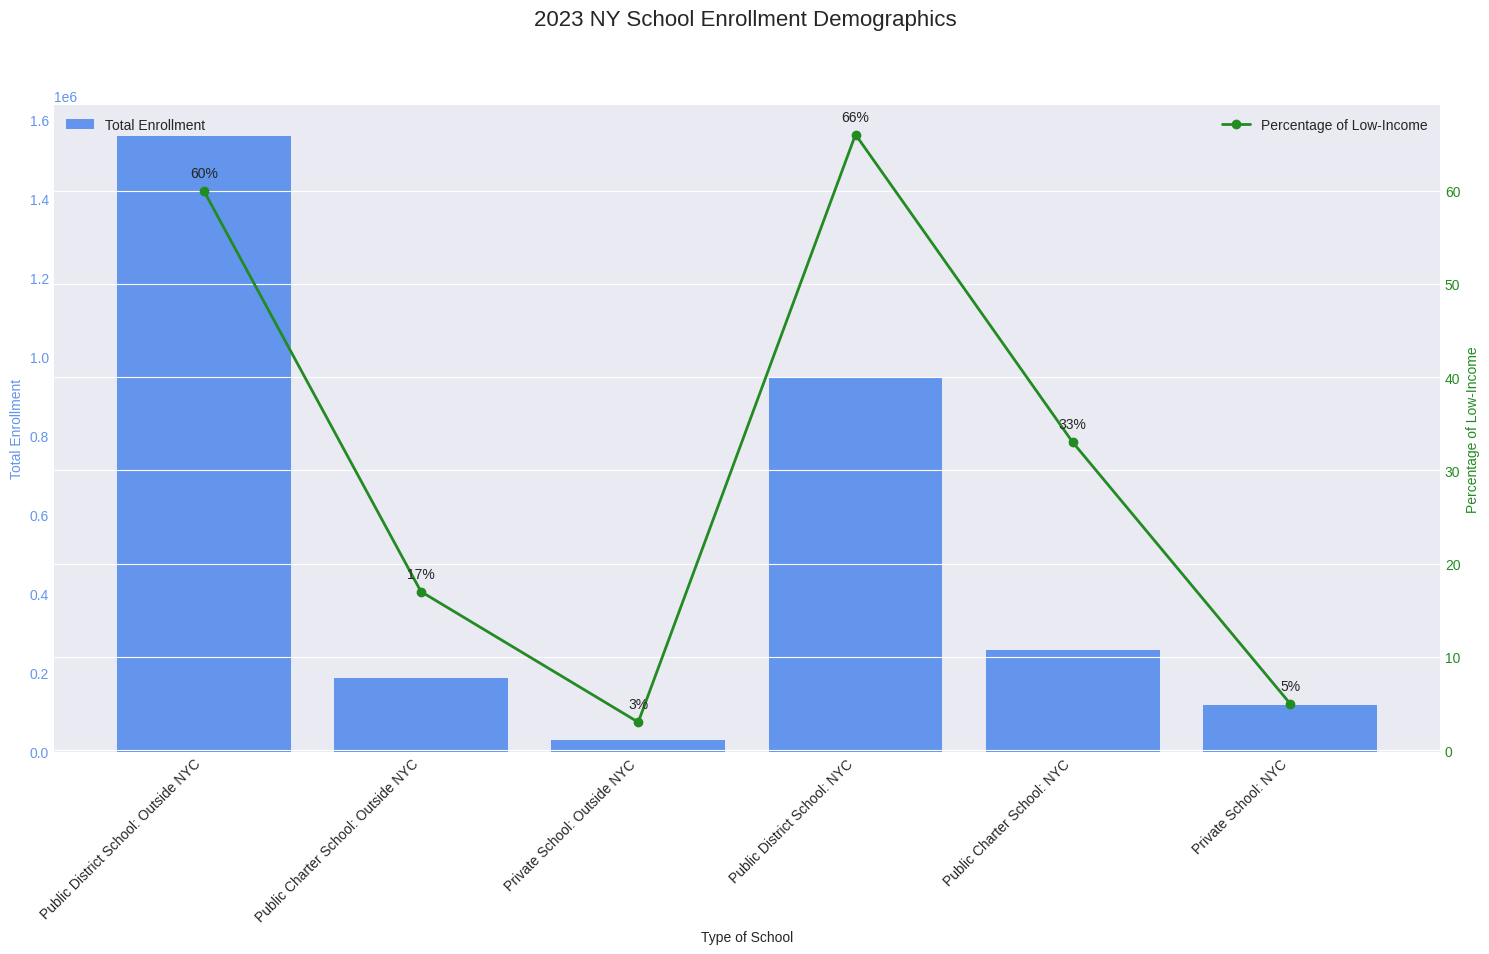

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Type of School': ['Public District School: Outside NYC', 'Public Charter School: Outside NYC', 'Private School: Outside NYC',
                       'Public District School: NYC', 'Public Charter School: NYC', 'Private School: NYC'],
    'Total Enrollment': [1558235, 185916, 28460, 948047, 256678, 118997],
    'Percentage of Low-Income': [60, 17, 3, 66, 33, 5]
}

private_school = pd.DataFrame(data)

# Setup the plot
plt.style.use('seaborn-darkgrid')
fig, ax1 = plt.subplots(figsize=(15,10))
fig.suptitle('2023 NY School Enrollment Demographics', fontsize=16)

# Bar plot for Total Enrollment
color = 'cornflowerblue'
ax1.set_xlabel('Type of School')
ax1.set_ylabel('Total Enrollment', color=color)
bars = ax1.bar(private_school['Type of School'], private_school['Total Enrollment'], color=color, label='Total Enrollment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(private_school['Type of School'], rotation=45, ha="right")

# Remove grid lines
ax1.grid(False)

# Adding legend for Total Enrollment
ax1.legend(loc='upper left')

# Line plot for Percentage of Low-Income on the second y-axis
ax2 = ax1.twinx()
color = 'forestgreen'
ax2.set_ylabel('Percentage of Low-Income', color=color)
line = ax2.plot(private_school['Type of School'], private_school['Percentage of Low-Income'], color=color, marker='o', linewidth=2, linestyle='-', label='Percentage of Low-Income')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate the percentage numbers
for i, txt in enumerate(private_school['Percentage of Low-Income']):
    ax2.annotate(f"{txt}%", (private_school['Type of School'][i], private_school['Percentage of Low-Income'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adding legend for Percentage of Low-Income
ax2.legend(loc='upper right')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for title
plt.show()


In [ ]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

# Define matrix A
A = np.array([[-1.85, 0.6, 0.6, 0.4, 0.2],
              [0.4, -1.65, 0.8, 0.2, 0.2],
              [0.2, 0.4, -1.25, 0.4, 0.2],
              [0.2, 0.2, 0.8, -1.65, 0.4],
              [0.2, 0.4, 0.6, 0.6, -1.85]])

# Define matrix B
B = np.array([1, 3, 5, 8, 12])

# Compute the inverse of matrix A
A_inv = np.linalg.inv(A)

# Multiply the inverse of A by matrix B to find g
g = np.dot(A_inv, B)

g

array([-108.63144636, -109.34712014, -110.71623838, -112.66490829,
       -114.32098666])

In [ ]:
A = np.array([[-1.85, 0.6, 0.6, 0.4, 0.2],
              [0.4, -1.65, 0.8, 0.2, 0.2],
              [0.2, 0.4, -1.25, 0.4, 0.2],
              [0.2, 0.2, 0.8, -1.65, 0.4],
              [0.2, 0.4, 0.6, 0.6, -1.85]])

# Calculate the sum of each row
row_sums = np.sum(A, axis=1)

print("Sum of each row in matrix A:")
print(row_sums)

Sum of each row in matrix A:
[-0.05 -0.05 -0.05 -0.05 -0.05]


In [ ]:
import numpy as np

# Define matrix A
A = np.array([[-1.85, 0.6, 0.6, 0.4, 0.2],
              [0.4, -1.65, 0.8, 0.2, 0.2],
              [0.2, 0.4, -1.25, 0.4, 0.2],
              [0.2, 0.2, 0.8, -1.65, 0.4],
              [0.2, 0.4, 0.6, 0.6, -1.85]])

# Define vector b
b = np.array([1, 3, 5, 8, 12])

# Calculate the inverse of matrix A
A_inv = np.linalg.inv(A)

# Calculate g
g = np.dot(A_inv, b)

print("Solution for g:")
print(g)

Solution for g:
[-108.63144636 -109.34712014 -110.71623838 -112.66490829 -114.32098666]
